In [1]:
#Load needed python routines

from matplotlib import pyplot as plt
import xrayutilities as xu
from scipy import misc
import os
import numpy as np
import pandas as pd
import peakutils
from matplotlib import rcParams
from matplotlib import patches
import sys


In [2]:
#Load 4-id-c functions 
from s4idc_funcs_v2 import *

In [3]:
#Set Fonts/Plot Style

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams.update({'font.size': 18})
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [4]:
%pwd

'/Users/sudippandey/All_Files/1.X-ray/Argonne/Beamline XMCD/Soft_Xray/Soft_XMCD_Data'

In [5]:
#Choose data file
specpath = "./data/"
specfile = "SSFeb21_mca.mca"

# Get the spec file
sf = specFile(specpath+specfile)
df = get_specScan(sf, 360)  #use file number
df.columns

DEPRECATION WARNING: DataObject.getInfo()
DEPRECATION WARNING: DataObject.getData()


Index(['SGM1:Energy', 'Sum_reflectivity', 'XMCD_reflectivity', 'Sum_TEY',
       'XMCD_TEY', 'Sum_FY', 'XMCD_FY', 'reference', 'ID04b:set_energy.VAL',
       'i0_A', 'TEY_A', '0', 'REF_A', 'i0_B', 'TEY_B', '01', 'REF_B',
       'XMCD_Sum', 'XMCD_Sum1', 'XMCD_Sum2', 'XMCD_TEY1', 'XMCD_TFY',
       'XMCD_REF', '4idc1:scaler1_calc6.VAL', '4idc1:scaler1.S7',
       'Magnet_Field', '4idc1:scaler2.S8', 'Data_anal', 'Data_anal1',
       'XMCD_Sum3', 'XMCD_Sum4', 'XMCD_TFY1', 'TEYN_1', 'TEYN_2', 'XMCD_TEY2',
       'REFN_1', 'REFN_2', 'XMCD_REF1', 'XMCD_Sum5', 'XMCD_Sum6', 'XMCD_Sum7',
       'i/o_fix', 'RFM_Focus', '4idc1:scaler1.S10',
       'Format_string_for_Ctl_query', 'Index'],
      dtype='object')

In [6]:
df.head()

,SGM1:Energy,Sum_reflectivity,XMCD_reflectivity,Sum_TEY,XMCD_TEY,Sum_FY,XMCD_FY,reference,ID04b:set_energy.VAL,i0_A,...,REFN_2,XMCD_REF1,XMCD_Sum5,XMCD_Sum6,XMCD_Sum7,i/o_fix,RFM_Focus,4idc1:scaler1.S10,Format_string_for_Ctl_query,Index
0,1420.03635,0.0,0.0,0.293624,0.000534,0.008453,-0.000895,0.478824,1.485998,13231.0,...,0.0,0.0,0.146812,0.004226,0.0,200.0,0.0,346.0,1.0,1.0
1,1419.84674,0.0,0.0,0.294615,0.000611,0.009333,0.000307,0.479189,1.483885,13278.0,...,0.0,0.0,0.147307,0.004667,0.0,200.0,0.0,345.0,1.0,2.0
2,1419.69509,0.0,0.0,0.293949,0.000616,0.009013,-0.001023,0.477993,1.484145,13267.0,...,0.0,0.0,0.146975,0.004506,0.0,200.0,0.0,345.0,1.0,3.0
3,1419.42979,0.0,0.0,0.293588,0.000702,0.009251,-0.000502,0.478629,1.484521,13259.0,...,0.0,0.0,0.146794,0.004626,0.0,200.0,0.0,346.0,1.0,4.0
4,1419.24034,0.0,0.0,0.293444,0.000638,0.009063,-0.002270,0.477728,1.485260,13248.0,...,0.0,0.0,0.146722,0.004532,0.0,200.0,0.0,345.0,1.0,5.0


In [7]:
df.columns

Index(['SGM1:Energy', 'Sum_reflectivity', 'XMCD_reflectivity', 'Sum_TEY',
       'XMCD_TEY', 'Sum_FY', 'XMCD_FY', 'reference', 'ID04b:set_energy.VAL',
       'i0_A', 'TEY_A', '0', 'REF_A', 'i0_B', 'TEY_B', '01', 'REF_B',
       'XMCD_Sum', 'XMCD_Sum1', 'XMCD_Sum2', 'XMCD_TEY1', 'XMCD_TFY',
       'XMCD_REF', '4idc1:scaler1_calc6.VAL', '4idc1:scaler1.S7',
       'Magnet_Field', '4idc1:scaler2.S8', 'Data_anal', 'Data_anal1',
       'XMCD_Sum3', 'XMCD_Sum4', 'XMCD_TFY1', 'TEYN_1', 'TEYN_2', 'XMCD_TEY2',
       'REFN_1', 'REFN_2', 'XMCD_REF1', 'XMCD_Sum5', 'XMCD_Sum6', 'XMCD_Sum7',
       'i/o_fix', 'RFM_Focus', '4idc1:scaler1.S10',
       'Format_string_for_Ctl_query', 'Index'],
      dtype='object')

In [8]:
a=df.iloc[:,0]
a.values

array([1420.03635, 1419.84674, 1419.69509, 1419.42979, 1419.24034,
       1419.08882, 1418.8616 , 1418.63446, 1418.44523, 1418.29388,
       1417.99128, 1417.84002, 1417.6132 , 1417.34867, 1417.19756,
       1417.00871, 1416.74441, 1416.59342, 1416.44246, 1416.17837,
       1416.02751, 1415.83897, 1415.65048, 1415.46204, 1415.23599,
       1415.04766, 1414.78409, 1414.63352, 1414.44535, 1414.25723,
       1414.03156, 1413.84355, 1413.69319, 1413.50527, 1413.3174 ,
       1413.09203, 1412.86673, 1412.60397, 1412.37882, 1412.22876,
       1412.00374, 1411.81627, 1411.62885, 1411.40401, 1411.25416,
       1411.02945, 1410.84224, 1410.65508, 1410.43055, 1410.2061 ,
       1409.98172, 1409.79479, 1409.64528, 1409.42107, 1409.23429,
       1409.04756, 1408.86088, 1408.67424, 1408.52497, 1408.26382,
       1408.07735, 1407.89092, 1407.63001, 1407.4437 , 1407.22019,
       1407.03399, 1406.84784, 1406.66174, 1406.47569, 1406.2153 ,
       1406.02937, 1405.80631, 1405.54617, 1405.39756, 1405.21

In [10]:
temp = 7
field=0

energy_Er, ref_sum_Er, xmcd_ref_Er, tey_sum_Er, xmcd_tey_Er, tfy_sum_Er, xmcd_tfy_Er,std_Er = XMCD(sf,41)

energy_Pr, ref_sum_Pr, xmcd_ref_Pr, tey_sum_Pr, xmcd_tey_Pr, tfy_sum_Pr, xmcd_tfy_Pr,std_Pr = XMCD(sf,373)


#reverse order of points

energy_Er = energy_Er[::-1]
tey_sum_Er = tey_sum_Er[::-1]
xmcd_tey_Er = xmcd_tey_Er[::-1]
tfy_sum_Er = tfy_sum_Er[::-1]
xmcd_tfy_Er = xmcd_tfy_Er[::-1]
ref_sum_Er = ref_sum_Er[::-1]
xmcd_ref_Er = xmcd_ref_Er[::-1]
std_Er = std_Er[::-1]

energy_Pr = energy_Pr[::-1]
tey_sum_Pr = tey_sum_Pr[::-1]
xmcd_tey_Pr = xmcd_tey_Pr[::-1]
tfy_sum_Pr = tfy_sum_Pr[::-1]
xmcd_tfy_Pr = xmcd_tfy_Pr[::-1]
ref_sum_Pr = ref_sum_Pr[::-1]
xmcd_ref_Pr = xmcd_ref_Pr[::-1]
std_Pr = std_Pr[::-1]



Text(0, 0.5, 'XMCD-EY')

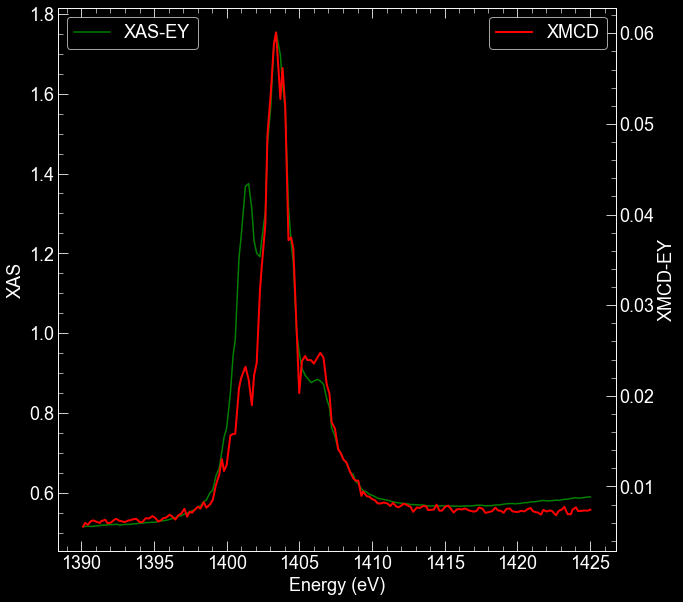

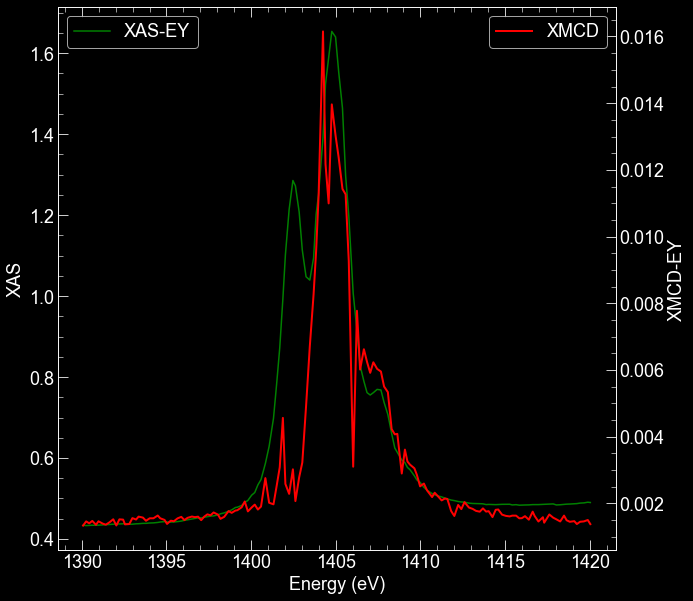

In [18]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,ax1 = plt.subplots(1,1,figsize=(10,10))
#ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax2 = ax1.twinx()
ax1.plot(energy_Er,tey_sum_Er,'g',label='XAS-EY')
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)
#ax2.tick_params(axis='both',direction='in',length=10,which='both')
ax2.plot(energy_Er,xmcd_tey_Er,'r',lw=2,label='XMCD')
ax2.legend(loc=0)
ax2.set_ylabel('XMCD-EY')

#Look at backgrounds and subtracted data

fig,ax1 = plt.subplots(1,1,figsize=(10,10))
#ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax2 = ax1.twinx()
ax1.plot(energy_Pr,tey_sum_Pr,'g',label='XAS-EY')
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)
#ax2.tick_params(axis='both',direction='in',length=10,which='both')
ax2.plot(energy_Pr,xmcd_tey_Pr,'r',lw=2,label='XMCD')
ax2.legend(loc=0)
ax2.set_ylabel('XMCD-EY')

In [11]:
sctey_Er, scxmcd_tey_Er = norm_xmcd(tey_sum_Er, xmcd_tey_Er)
sctey_Pr, scxmcd_tey_Pr = norm_xmcd(tey_sum_Pr, xmcd_tey_Pr)

Normalization:  1.238972942563
Normalization:  1.2209742384


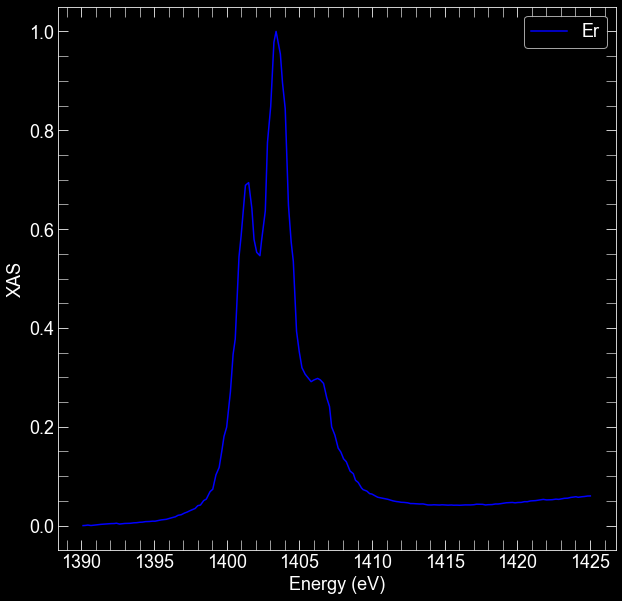

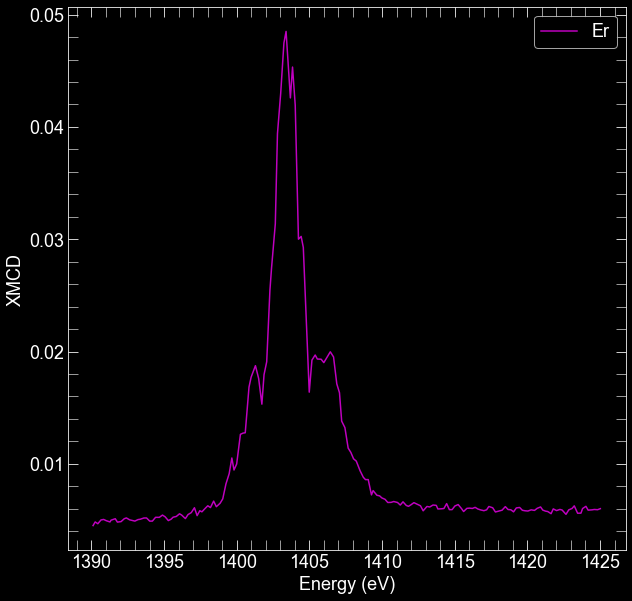

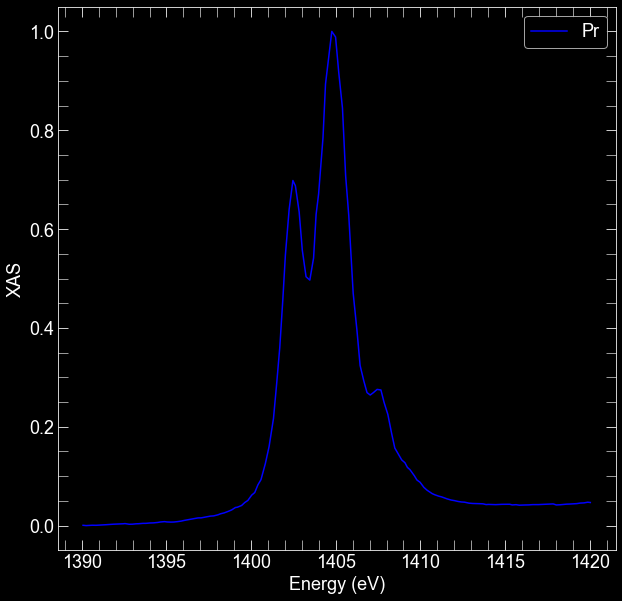

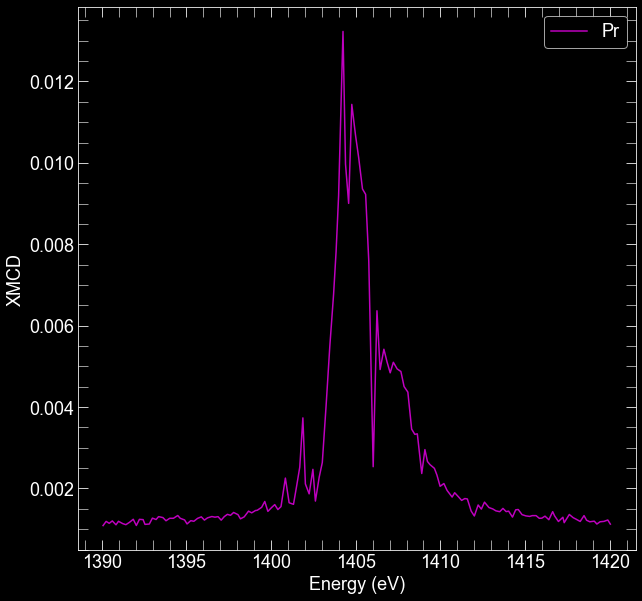

In [12]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax1.plot(energy_Er,sctey_Er,'b',label='Er')
ax1.legend()

#Look at backgrounds and subtracted data

fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XMCD')
ax1.set_xlabel('Energy (eV)')
ax1.plot(energy_Er,scxmcd_tey_Er,'m',label='Er')

ax1.legend()

#Look at backgrounds and subtracted data

fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax1.plot(energy_Pr,sctey_Pr,'b',label='Pr')
ax1.legend()

#Look at backgrounds and subtracted data

fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XMCD')
ax1.set_xlabel('Energy (eV)')
ax1.plot(energy_Pr,scxmcd_tey_Pr,'m',label='Pr')
ax1.legend()